In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
data = np.genfromtxt('histograms_csv/histo_long_background.txt')

In [4]:
nbins = range(len(data))

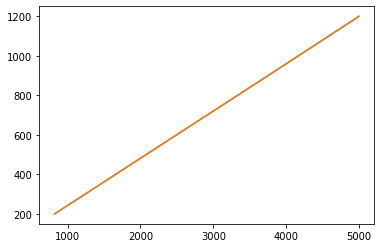

In [89]:
# Calibrate
long_calib = np.genfromtxt('histograms_csv/histo_time_calib_background_2ms.txt')
ns = np.array([200, 400, 600, 800, 1000, 1200])
nstobin = np.array([823, 1661, 2497, 3336, 4170, 4999])
plt.plot(nstobin,ns)

def linfit(x, m, b):
    return m*x + b
popt, pcov = curve_fit(linfit, nstobin, ns)
plt.plot(nstobin, linfit(nstobin, *popt))

def bintons(bin_):
    return 0.2393481*bin_ + 2.45985836

In [97]:
# Rebin the data
def rebin(x, y, nbins=1000):
    total_bins = len(x)
    per_bucket = int(total_bins/nbins)
    xchunks = list(zip(*[iter(x)]*per_bucket))
    ychunks = list(zip(*[iter(y)]*per_bucket))
    
    chunks = list(zip(xchunks, ychunks))
    
    x = []
    y = []
    
    for chunk in chunks:
        x.append(np.mean(chunk[0]))
        y.append(sum(chunk[1]))
    return np.array(x), np.array(y)

(array([3.5000e+00, 1.1500e+01, 1.9500e+01, ..., 8.1715e+03, 8.1795e+03,
        8.1875e+03]), array([  0.,   0.,   0., ..., 405., 317., 291.]))

[-0.00039411]


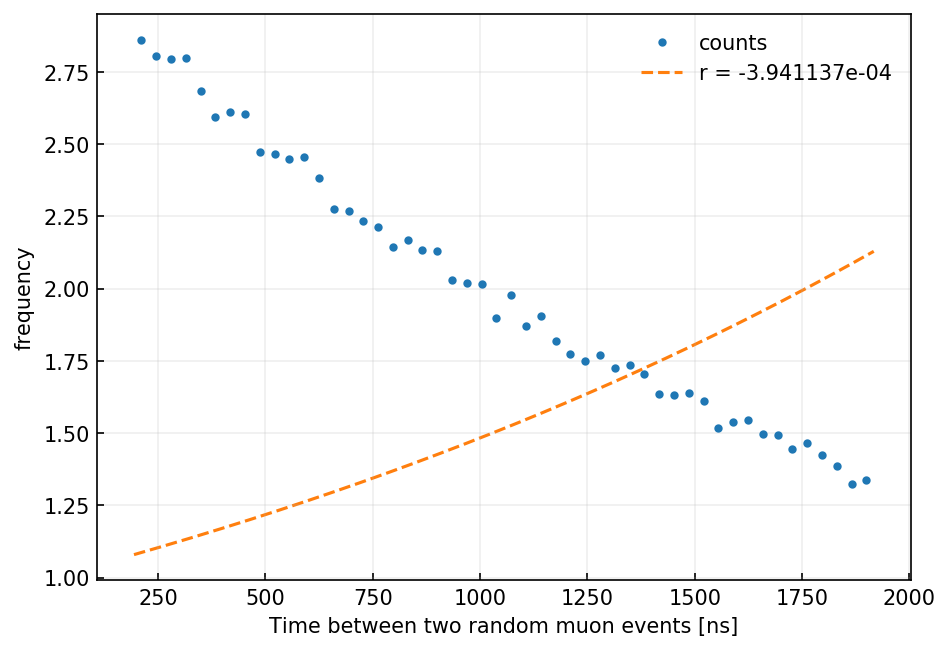

In [156]:
x = bintons(np.array(nbins[800:8000]))
counts = np.array(data[800:8000])
y = counts/sum(counts)*100
xdata, ydata = rebin(x, y, nbins = 50)

fig, ax = plt.subplots(figsize=(7,5),dpi=150)
ax.plot(xdata, ydata, label = "counts", linestyle='none', marker='.')

def func(x, b):
    return np.exp(-b * x)

popt, cov = curve_fit(func, xdata, ydata, p0=(1e-6))
print(popt)
ax.plot(x, func(x, *popt), label="r = {:e}".format(*popt), linestyle='--', zorder=0)

ax.set(xlabel="Time between two random muon events [ns]", ylabel="frequency")
ax.tick_params(direction="in", which="both")
ax.grid(alpha=0.2)
ax.legend(frameon=False)

plt.savefig("reports/muon_bg.png")